# Major Project Exam: Exploratory Data Analysis (EDA) and Machine Learning Integration

### Problem statement:
Perform a comprehensive analysis on the given dataset using Python, incorporating exploratory data analysis (EDA) and machine learning techniques. Your task is to preprocess the data, engineer features, select and train models, and evaluate their performance. 

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations. 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Section 1: Understanding the Dataset

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [6]:
import pandas as pd
df = pd.read_csv('car_price_dataset.csv')

#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [8]:
print(df.shape)

(15411, 14)


#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [10]:
print(df.head())
print(df.tail())

   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         2

### Section 2: Initial Data Examination

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [15]:
print(df.dtypes)

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object


In [16]:
cat_df = df.select_dtypes(include="object")
cat_df

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
15407,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
15408,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
15409,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


In [17]:
for each_col in cat_df.columns:
    print(each_col) 
    print("Count =",len(df[each_col].unique()))
    if len(df[each_col].unique())<=10:
          print(df[each_col].unique())
    print("=================")

car_name
Count = 121
brand
Count = 32
model
Count = 120
seller_type
Count = 3
['Individual' 'Dealer' 'Trustmark Dealer']
fuel_type
Count = 5
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
transmission_type
Count = 2
['Manual' 'Automatic']


In [18]:
df['car_name']= df['car_name'].astype('category')
df['brand']= df['brand'].astype('category')
df['model']= df['model'].astype('category')
df['seller_type']= df['seller_type'].astype('category')
df['fuel_type']= df['fuel_type'].astype('category')
df['transmission_type']= df['transmission_type'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         15411 non-null  int64   
 1   car_name           15411 non-null  category
 2   brand              15411 non-null  category
 3   model              15411 non-null  category
 4   vehicle_age        15411 non-null  int64   
 5   km_driven          15411 non-null  int64   
 6   seller_type        15411 non-null  category
 7   fuel_type          15411 non-null  category
 8   transmission_type  15411 non-null  category
 9   mileage            15411 non-null  float64 
 10  engine             15411 non-null  int64   
 11  max_power          15411 non-null  float64 
 12  seats              15411 non-null  int64   
 13  selling_price      15411 non-null  int64   
dtypes: category(6), float64(2), int64(6)
memory usage: 1.0 MB


#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [21]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


#### 2.4 Provide detailed comments that explain your understanding of the data.

In [23]:
 ## This shows that there are 115411.000000 vehicles from the age 0.00000 up to 29.000000, and an average  age 6.036338, 
 ##The  Vehicles consist of km_driven  with an average of  5.561648e+04	  ranging from  1.000000e+02	to  3.800000e+06 , considering the mileage  average of19.701151 ranging from 4.000000 to 33.540000 , engine average of 1486.057751 ranging from 793.000000	 to 6592.000000	 ,maxpower average of 100.588254 ranging from  38.40000 to 626.000000	,  to determine the selling price  

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [26]:
print(df.isnull().sum())

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [27]:
df['selling_price'].fillna(df['selling_price'].mean(), inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\3652558797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['selling_price'].fillna(df['selling_price'].mean(), inplace=True)


In [28]:
df['mileage'].fillna(df['mileage'].mean(), inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\2773901341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].mean(), inplace=True)


In [29]:
df['vehicle_age'].fillna(df['vehicle_age'].mean(), inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\4161176005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vehicle_age'].fillna(df['vehicle_age'].mean(), inplace=True)


In [30]:
df['km_driven'].fillna(df['km_driven'].mean(), inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\2303282547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['km_driven'].fillna(df['km_driven'].mean(), inplace=True)


In [31]:
df['seats'].fillna(df['seats'].mean(), inplace=True)


C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\1425599031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seats'].fillna(df['seats'].mean(), inplace=True)


In [32]:
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\628916306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)


In [33]:
df['transmission_type'].fillna(df['transmission_type'].mode()[0], inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\2958098848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission_type'].fillna(df['transmission_type'].mode()[0], inplace=True)


In [34]:
df['seller_type'].fillna(df['seller_type'].mode()[0], inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\990690147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seller_type'].fillna(df['seller_type'].mode()[0], inplace=True)


In [35]:
df['car_name'].fillna(df['car_name'].mode()[0], inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\280286866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['car_name'].fillna(df['car_name'].mode()[0], inplace=True)


In [36]:
df['brand'].fillna(df['brand'].mode()[0], inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\2634329576.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna(df['brand'].mode()[0], inplace=True)


In [37]:
df['max_power'].fillna(df['max_power'].mean(), inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\253554455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].mean(), inplace=True)


In [38]:
df['engine'].fillna(df['engine'].mean(), inplace=True)

C:\Users\Shupi\AppData\Local\Temp\ipykernel_19748\44435604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].mean(), inplace=True)


In [39]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns)

#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [41]:
df.duplicated().sum()

0

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.reset_index(drop=True, inplace=True)

#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.

In [45]:
num_df = df.select_dtypes(include = "number")
num_df

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,0,9,120000,19.70,796,46.30,5,120000
1,1,5,20000,18.90,1197,82.00,5,550000
2,2,11,60000,17.00,1197,80.00,5,215000
3,3,9,37000,20.92,998,67.10,5,226000
4,4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,250000
15407,19540,2,18000,17.50,1373,91.10,7,925000
15408,19541,6,67000,21.14,1498,103.52,5,425000
15409,19542,5,3800000,16.00,2179,140.00,7,1225000


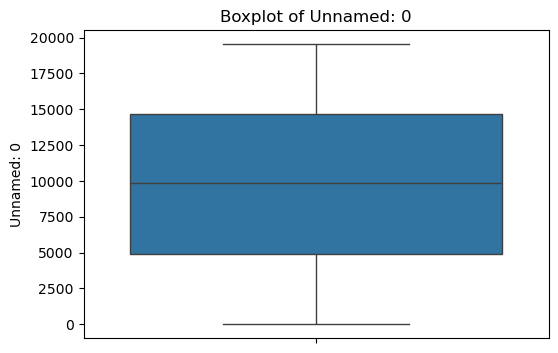

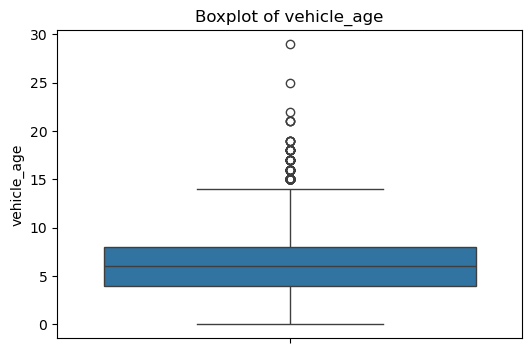

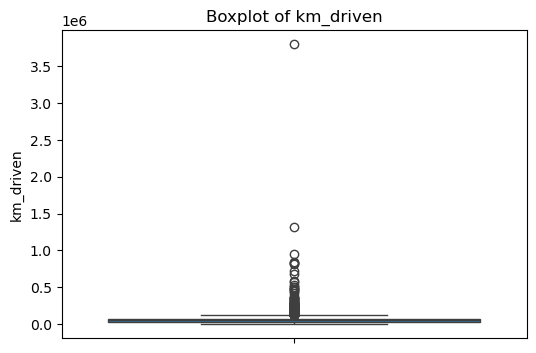

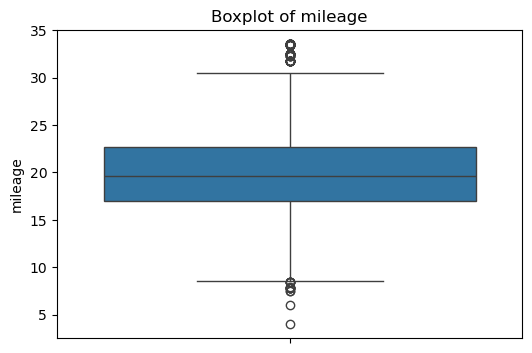

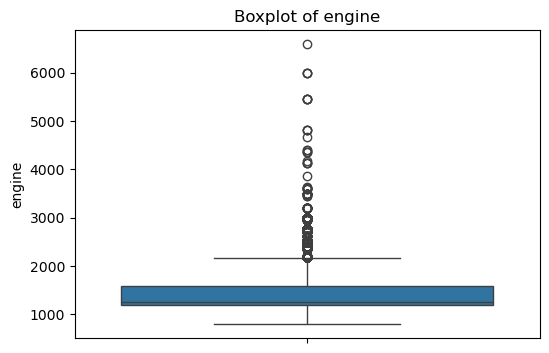

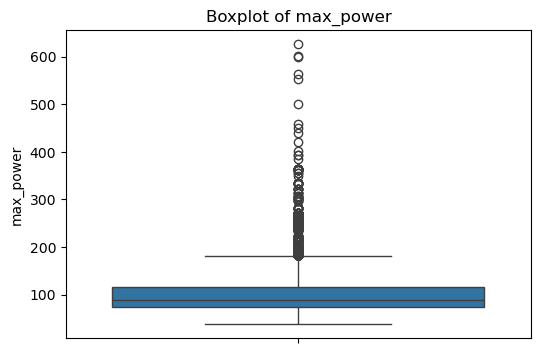

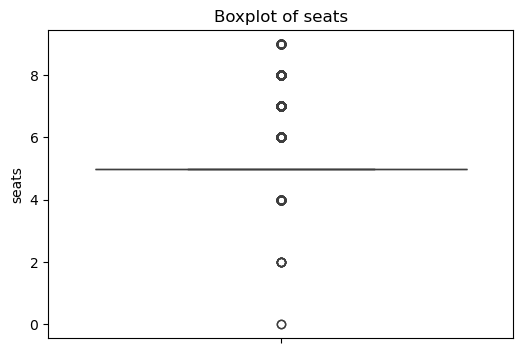

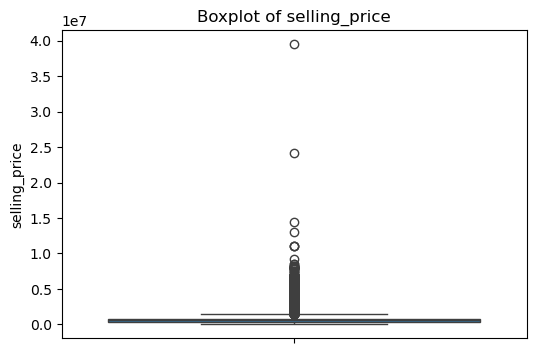

In [46]:
for col in num_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [47]:
np.quantile(df['selling_price'],0.25)

385000.0

In [48]:
q1 = np.quantile(df['selling_price'], 0.25)
q3 = np.quantile(df['selling_price'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR

### Use IQR to find lower and upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)

### Use these limits to remove instances (rows)
index_list = df.index[ (df['selling_price'] < lower_limit) | (df['selling_price'] > upper_limit) ]
print(index_list, len(index_list))
df = df.drop(index_list)
print(df.shape)

385000.0 825000.0
-275000.0 1485000.0
Index([   12,    58,   111,   129,   139,   184,   203,   206,   240,   278,
       ...
       15298, 15306, 15320, 15333, 15341, 15360, 15362, 15384, 15392, 15397],
      dtype='int64', length=1386) 1386
(14025, 14)


In [49]:
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
14021,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
14022,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
14023,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


#### 3.4 Add python comments to explain the observations.

In [51]:
##From the observed data set, the data contains no missing values and no duplicates. It is clean and consists of outliers, which were removed for the target variable, replaced with the upper bound and lower bound, which could add more noise to the data

### Section 4: Data Analysis

In [53]:
num_df

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,0,9,120000,19.70,796,46.30,5,120000
1,1,5,20000,18.90,1197,82.00,5,550000
2,2,11,60000,17.00,1197,80.00,5,215000
3,3,9,37000,20.92,998,67.10,5,226000
4,4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,250000
15407,19540,2,18000,17.50,1373,91.10,7,925000
15408,19541,6,67000,21.14,1498,103.52,5,425000
15409,19542,5,3800000,16.00,2179,140.00,7,1225000


#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

0.8393041839515561


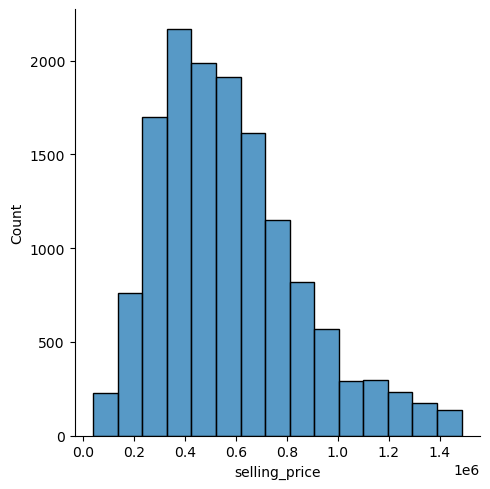

In [55]:
sns.displot(x='selling_price', data= df, bins=15 )

### Compute skewness
print(df['selling_price'].skew())

### @Selling_Price feature is moderately right skewed

0.8108248925600668


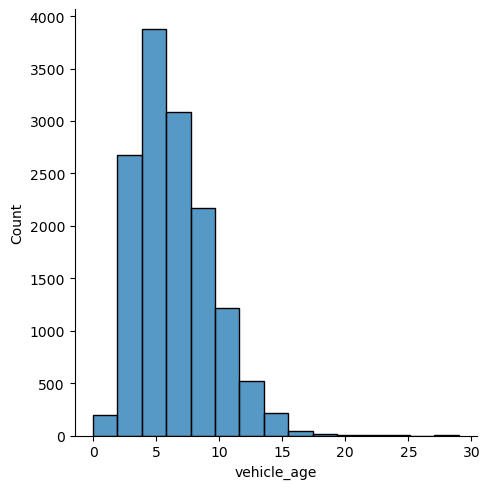

In [56]:
sns.displot(x='vehicle_age', data= df, bins=15 )

### Compute skewness
print(df['vehicle_age'].skew())

### @Selling_Price feature is moderately right skewed

28.551700837516496


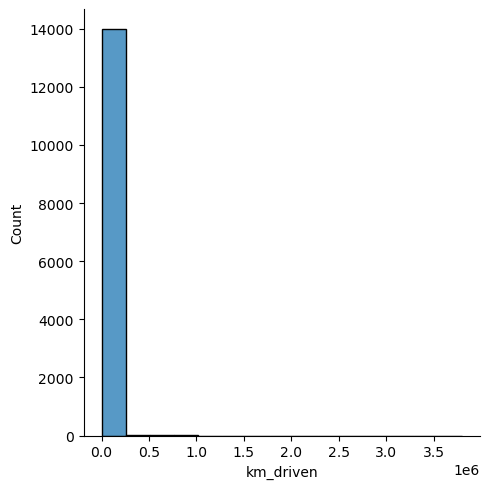

In [57]:
sns.displot(x='km_driven', data= df, bins=15 )

### Compute skewness
print(df['km_driven'].skew())

### @Selling_Price feature is moderately right skewed

0.1332003398993376


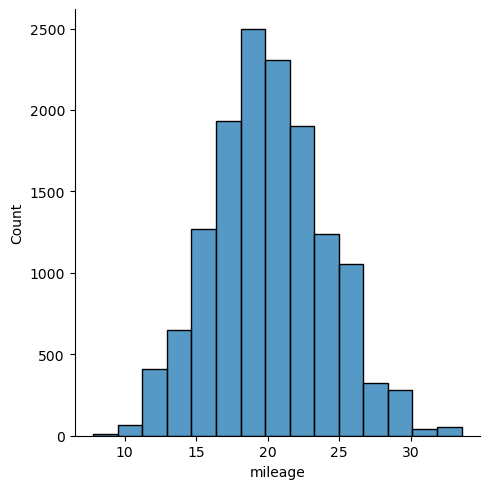

In [58]:
sns.displot(x='mileage', data= df, bins=15 )

### Compute skewness
print(df['mileage'].skew())

### @Selling_Price feature is moderately right skewed

1.5759368511557352


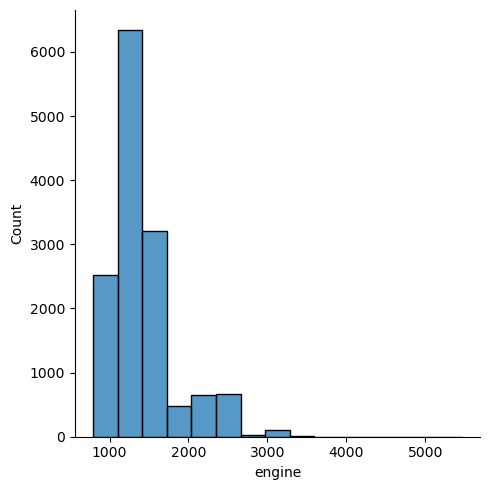

In [59]:
sns.displot(x='engine', data= df, bins=15 )

### Compute skewness
print(df['engine'].skew())

### @Selling_Price feature is moderately right skewed

1.8518318927409783


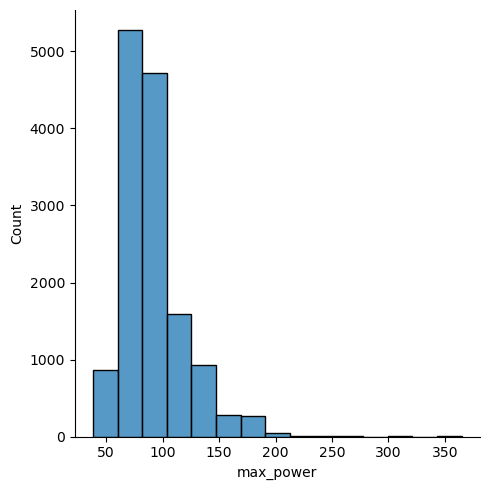

In [60]:
sns.displot(x='max_power', data= df, bins=15 )

### Compute skewness
print(df['max_power'].skew())

### @Selling_Price feature is moderately right skewed

2.3425835449405823


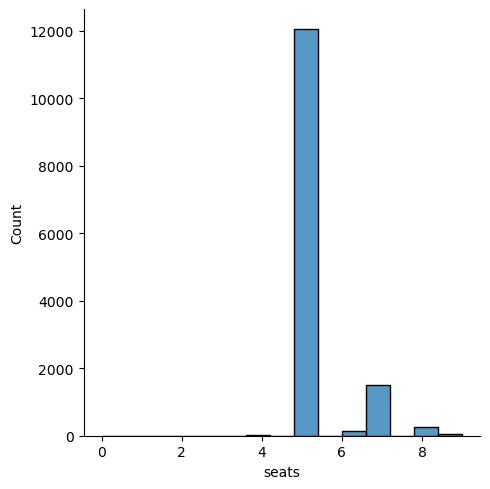

In [61]:
sns.displot(x='seats', data= df, bins=15 )

### Compute skewness
print(df['seats'].skew())

### @Selling_Price feature is moderately right skewed

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

-1.025318531126844


-1.025318531126844

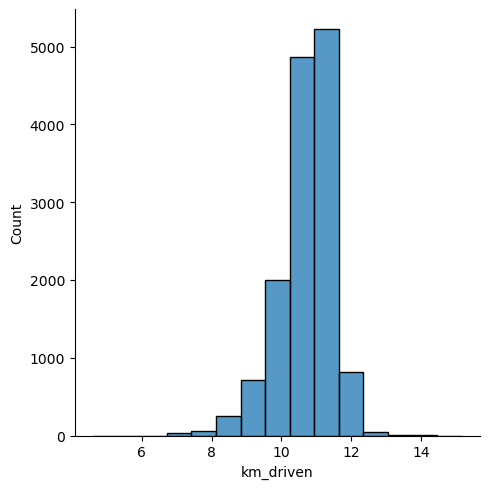

In [63]:
### Apply logarithm function to reduce the skewness
### data transformation technique applied
Kms_Driven_log = np.log(df['km_driven'] + 1)
print(Kms_Driven_log.skew())
sns.displot(x=Kms_Driven_log,bins=15)

### IMPORTANT STEP
df['km_driven'] = Kms_Driven_log
df['km_driven'].skew()

#### 4.3 Apply appropriate standardization method wherever applicable.

In [65]:
cate_df = df.select_dtypes(include="category")
cate_df

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
14020,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
14021,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
14022,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
14023,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.

In [67]:
cate_df = df.select_dtypes(include="category")
cate_df

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
14020,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
14021,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
14022,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
14023,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


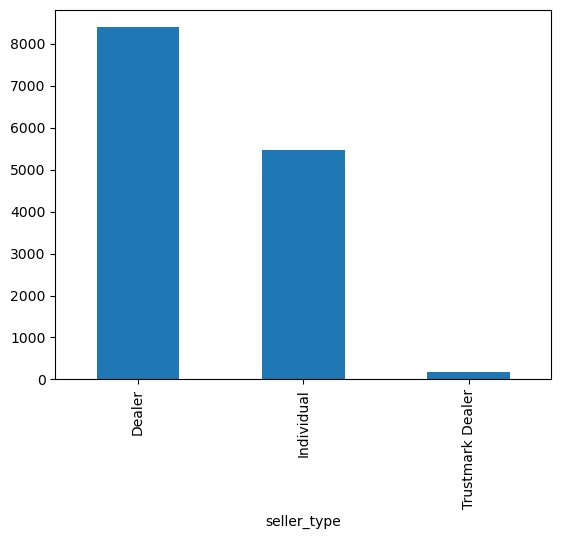

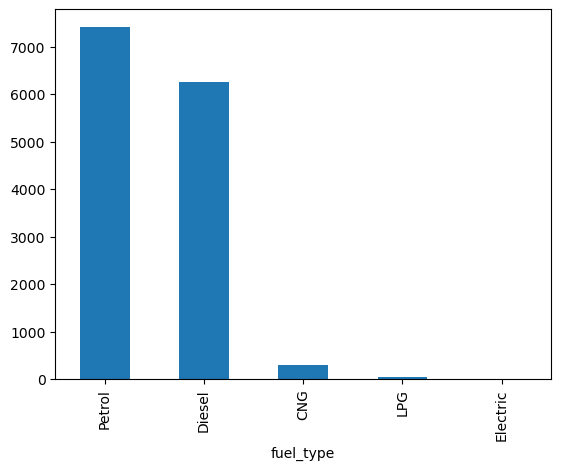

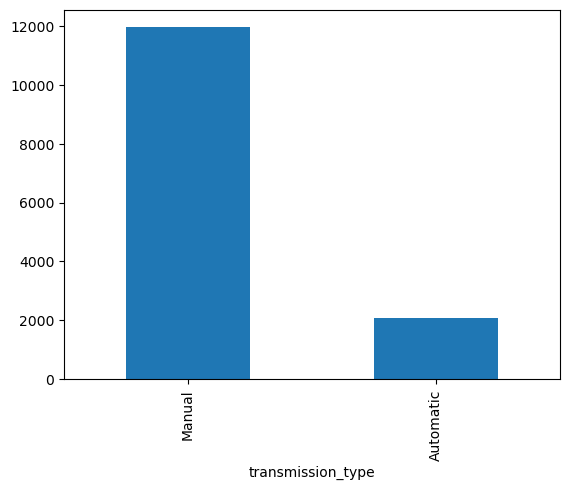

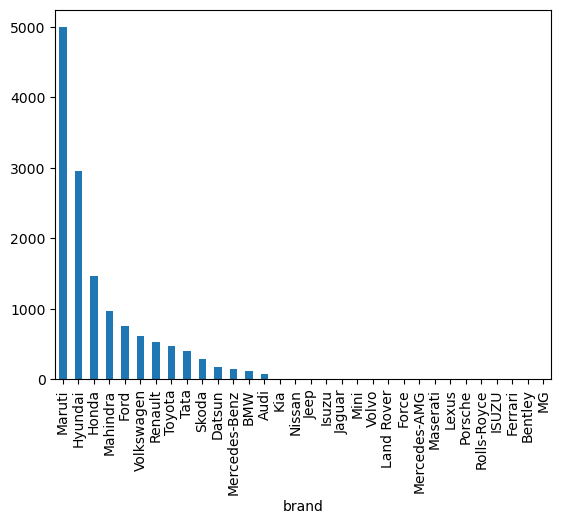

In [311]:
df['seller_type'].value_counts().plot(kind='bar')
plt.show()
df['fuel_type'].value_counts().plot(kind='bar')
plt.show()
df['transmission_type'].value_counts().plot(kind='bar')
plt.show()
df['brand'].value_counts().plot(kind='bar')
plt.show()


#### 4.5 Encode categorical features

In [313]:
### Apply label encoding for transmission (Manual = 0, Automatic = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['transmission_type'] = le.fit_transform(df['transmission_type'])
# Display the first few rows of the encoded 'Transmission' column
df[['transmission_type']].head()
print(le.classes_)

['Automatic' 'Manual']


In [314]:
df['seller_type'] = le.fit_transform(df['seller_type'])
# Display the first few rows 
df[['seller_type']].head()
print(le.classes_)

['Dealer' 'Individual' 'Trustmark Dealer']


In [315]:
df['fuel_type'] = le.fit_transform(df['fuel_type'])
# Display the first few rows 
df[['fuel_type']].head()
print(le.classes_)

['CNG' 'Diesel' 'LPG' 'Petrol']


In [316]:
df['brand'] = le.fit_transform(df['brand'])
# Display the first few rows 
df[['brand']].head()
print(le.classes_)

['Audi' 'BMW' 'Datsun' 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar'
 'Jeep' 'Kia' 'Land Rover' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini'
 'Nissan' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [317]:
df['model'] = le.fit_transform(df['model'])
# Display the first few rows 
df[['model']].head()
print(le.classes_)

['3' '5' '7' 'A4' 'A6' 'Alto' 'Altroz' 'Amaze' 'Aspire' 'Aura' 'Baleno'
 'Bolero' 'C-Class' 'CLS' 'CR' 'CR-V' 'Camry' 'Celerio' 'Ciaz' 'City'
 'Civic' 'Compass' 'Cooper' 'Creta' 'D-Max' 'Duster' 'Dzire LXI'
 'Dzire VXI' 'Dzire ZXI' 'E-Class' 'Ecosport' 'Eeco' 'Elantra' 'Endeavour'
 'Ertiga' 'Figo' 'Fortuner' 'Freestyle' 'GO' 'Glanza' 'Grand' 'Gurkha'
 'Harrier' 'Hexa' 'Ignis' 'Innova' 'Jazz' 'KUV' 'KUV100' 'KWID' 'Kicks'
 'Marazzo' 'Nexon' 'Octavia' 'Polo' 'Q7' 'Rapid' 'RediGO' 'Rover'
 'S-Class' 'S-Presso' 'Safari' 'Santro' 'Scorpio' 'Seltos' 'Superb'
 'Swift' 'Swift Dzire' 'Thar' 'Tiago' 'Tigor' 'Triber' 'Vento' 'Venue'
 'Verna' 'Vitara' 'WR-V' 'Wagon R' 'X-Trail' 'X1' 'X3' 'X5' 'XC' 'XC60'
 'XF' 'XL6' 'XUV300' 'XUV500' 'Yaris' 'i10' 'i20' 'redi-GO']


In [318]:
df_encoded= pd.get_dummies(df, columns=['car_name'], drop_first=True)
df_encoded.head()

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,...,car_name_Toyota Fortuner,car_name_Toyota Glanza,car_name_Toyota Innova,car_name_Toyota Yaris,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S90,car_name_Volvo XC,car_name_Volvo XC60,car_name_Volvo XC90
0,0,13,5,9,11.695255,1,3,1,19.70,796,...,False,False,False,False,False,False,False,False,False,False
1,1,6,40,5,9.903538,1,3,1,18.90,1197,...,False,False,False,False,False,False,False,False,False,False
2,2,6,90,11,11.002117,1,3,1,17.00,1197,...,False,False,False,False,False,False,False,False,False,False
3,3,13,5,9,10.518700,1,3,1,20.92,998,...,False,False,False,False,False,False,False,False,False,False
4,4,4,30,6,10.308986,0,1,1,22.77,1498,...,False,False,False,False,False,False,False,False,False,False


In [454]:
df_encoded

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,...,car_name_Toyota Fortuner,car_name_Toyota Glanza,car_name_Toyota Innova,car_name_Toyota Yaris,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S90,car_name_Volvo XC,car_name_Volvo XC60,car_name_Volvo XC90
0,0,13,5,9,11.695255,1,3,1,19.70,796,...,False,False,False,False,False,False,False,False,False,False
1,1,6,40,5,9.903538,1,3,1,18.90,1197,...,False,False,False,False,False,False,False,False,False,False
2,2,6,90,11,11.002117,1,3,1,17.00,1197,...,False,False,False,False,False,False,False,False,False,False
3,3,13,5,9,10.518700,1,3,1,20.92,998,...,False,False,False,False,False,False,False,False,False,False
4,4,4,30,6,10.308986,0,1,1,22.77,1498,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,6,89,9,9.280239,0,3,1,19.81,1086,...,False,False,False,False,False,False,False,False,False,False
14021,19540,13,34,2,9.798183,0,3,1,17.50,1373,...,False,False,False,False,False,False,False,False,False,False
14022,19541,18,56,6,11.112463,0,1,1,21.14,1498,...,False,False,False,False,False,False,False,False,False,False
14023,19542,12,87,5,15.150512,0,1,1,16.00,2179,...,False,False,False,False,False,False,False,False,False,False


In [319]:
df_encoded.dtypes

Unnamed: 0                     int64
brand                          int32
model                          int32
vehicle_age                    int64
km_driven                    float64
                              ...   
car_name_Volkswagen Vento       bool
car_name_Volvo S90              bool
car_name_Volvo XC               bool
car_name_Volvo XC60             bool
car_name_Volvo XC90             bool
Length: 133, dtype: object

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded[:])

In [321]:
scaled

array([[-1.73305893,  0.4093613 , -1.58367923, ..., -0.00844431,
        -0.00844431,  0.        ],
       [-1.73288125, -0.93358617, -0.30384824, ..., -0.00844431,
        -0.00844431,  0.        ],
       [-1.73270357, -0.93358617,  1.52448175, ..., -0.00844431,
        -0.00844431,  0.        ],
       ...,
       [ 1.73899696,  1.3686095 ,  0.28121736, ..., -0.00844431,
        -0.00844431,  0.        ],
       [ 1.73917464,  0.21751167,  1.41478195, ..., -0.00844431,
        -0.00844431,  0.        ],
       [ 1.73935232, -1.1254358 , -1.07174683, ..., -0.00844431,
        -0.00844431,  0.        ]])

In [322]:
scaled.shape

(14025, 133)

In [323]:
df.shape

(14025, 14)

In [324]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000
1,1,Hyundai Grand,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000
2,2,Hyundai i20,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000
3,3,Maruti Alto,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000
4,4,Ford Ecosport,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,Hyundai i10,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000
14021,19540,Maruti Ertiga,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000
14022,19541,Skoda Rapid,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000
14023,19542,Mahindra XUV500,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000


In [325]:
scaled_df = pd.DataFrame(scaled, columns=df_encoded.columns)
print(scaled_df)

       Unnamed: 0     brand     model  vehicle_age  km_driven  seller_type  \
0       -1.733059  0.409361 -1.583679     0.932873   1.305123     1.133362   
1       -1.732881 -0.933586 -0.303848    -0.377972  -1.029554     1.133362   
2       -1.732704 -0.933586  1.524482     1.588295   0.401936     1.133362   
3       -1.732526  0.409361 -1.583679     0.932873  -0.227974     1.133362   
4       -1.732348 -1.317285 -0.669514    -0.050261  -0.501239    -0.801326   
...           ...       ...       ...          ...        ...          ...   
14020    1.738286 -0.933586  1.487915     0.932873  -1.841736    -0.801326   
14021    1.738819  0.409361 -0.523248    -1.361106  -1.166836    -0.801326   
14022    1.738997  1.368609  0.281217    -0.050261   0.545722    -0.801326   
14023    1.739175  0.217512  1.414782    -0.377972   5.807455    -0.801326   
14024    1.739352 -1.125436 -1.071747    -1.361106  -1.590846    -0.801326   

       fuel_type  transmission_type   mileage    engine  ...  \

#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

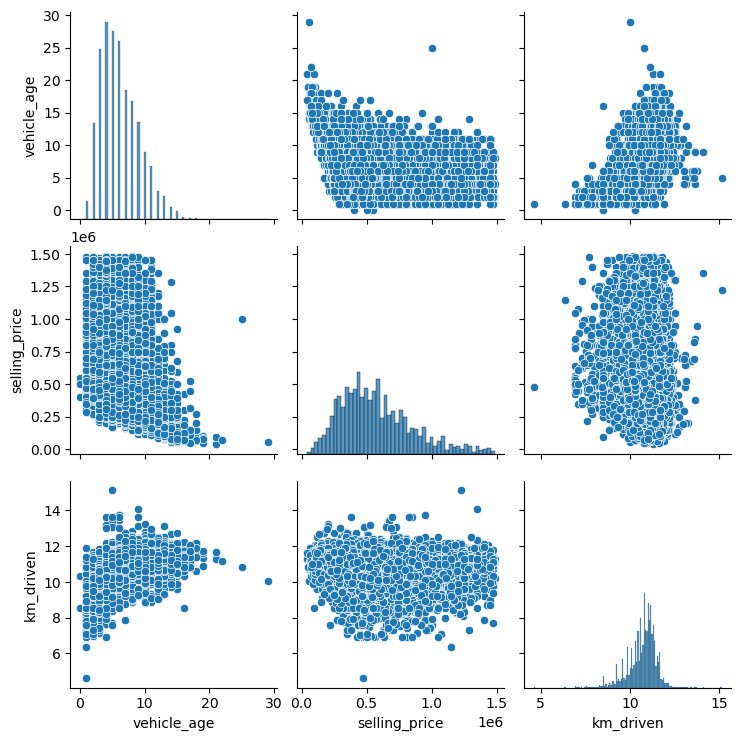

In [327]:
sns.pairplot(df, vars=["vehicle_age","selling_price", "km_driven"])

#### 4.7 Provide detailed observations and conclusions.

In [329]:
###There is a strong correlation with these features as the  pairplot has data that is closely  packed, showing how each feature is dependent on the other, and all impact the  target variable selling price  

### Section 5: Feature Selection 

#### 5.1 Use correlation result for feature selection.

In [332]:
corr_with_target = scaled_df.corr()['selling_price']
corr_with_target

Unnamed: 0                   0.020080
brand                       -0.002598
model                       -0.051040
vehicle_age                 -0.449703
km_driven                   -0.129546
                               ...   
car_name_Volkswagen Vento   -0.025131
car_name_Volvo S90                NaN
car_name_Volvo XC            0.018995
car_name_Volvo XC60          0.025062
car_name_Volvo XC90               NaN
Name: selling_price, Length: 133, dtype: float64

In [333]:
corr_with_target = abs(corr_with_target)
corr_with_target

Unnamed: 0                   0.020080
brand                        0.002598
model                        0.051040
vehicle_age                  0.449703
km_driven                    0.129546
                               ...   
car_name_Volkswagen Vento    0.025131
car_name_Volvo S90                NaN
car_name_Volvo XC            0.018995
car_name_Volvo XC60          0.025062
car_name_Volvo XC90               NaN
Name: selling_price, Length: 133, dtype: float64

In [334]:
selected_features = corr_with_target.sort_values(ascending=False).head(10).index.tolist()
type(selected_features)
selected_features

['selling_price',
 'max_power',
 'engine',
 'vehicle_age',
 'transmission_type',
 'fuel_type',
 'car_name_Maruti Alto',
 'seats',
 'car_name_Hyundai Creta',
 'car_name_Maruti Wagon R']

In [335]:
numeric_cols = scaled_df.columns.tolist()

# Identify features to be dropped (excluding selected features and target)
features_to_drop = [col for col in numeric_cols if col not in selected_features and col != 'Selling_Price']

# Display features to be dropped
features_to_drop

['Unnamed: 0',
 'brand',
 'model',
 'km_driven',
 'seller_type',
 'mileage',
 'car_name_Audi A6',
 'car_name_Audi A8',
 'car_name_Audi Q7',
 'car_name_BMW 3',
 'car_name_BMW 5',
 'car_name_BMW 6',
 'car_name_BMW 7',
 'car_name_BMW X1',
 'car_name_BMW X3',
 'car_name_BMW X4',
 'car_name_BMW X5',
 'car_name_BMW Z4',
 'car_name_Bentley Continental',
 'car_name_Datsun GO',
 'car_name_Datsun RediGO',
 'car_name_Datsun redi-GO',
 'car_name_Ferrari GTC4Lusso',
 'car_name_Force Gurkha',
 'car_name_Ford Aspire',
 'car_name_Ford Ecosport',
 'car_name_Ford Endeavour',
 'car_name_Ford Figo',
 'car_name_Ford Freestyle',
 'car_name_Honda Amaze',
 'car_name_Honda CR',
 'car_name_Honda CR-V',
 'car_name_Honda City',
 'car_name_Honda Civic',
 'car_name_Honda Jazz',
 'car_name_Honda WR-V',
 'car_name_Hyundai Aura',
 'car_name_Hyundai Elantra',
 'car_name_Hyundai Grand',
 'car_name_Hyundai Santro',
 'car_name_Hyundai Tucson',
 'car_name_Hyundai Venue',
 'car_name_Hyundai Verna',
 'car_name_Hyundai i10',


In [456]:
features_to_drop

['Unnamed: 0',
 'brand',
 'model',
 'km_driven',
 'seller_type',
 'mileage',
 'car_name_Audi A6',
 'car_name_Audi A8',
 'car_name_Audi Q7',
 'car_name_BMW 3',
 'car_name_BMW 5',
 'car_name_BMW 6',
 'car_name_BMW 7',
 'car_name_BMW X1',
 'car_name_BMW X3',
 'car_name_BMW X4',
 'car_name_BMW X5',
 'car_name_BMW Z4',
 'car_name_Bentley Continental',
 'car_name_Datsun GO',
 'car_name_Datsun RediGO',
 'car_name_Datsun redi-GO',
 'car_name_Ferrari GTC4Lusso',
 'car_name_Force Gurkha',
 'car_name_Ford Aspire',
 'car_name_Ford Ecosport',
 'car_name_Ford Endeavour',
 'car_name_Ford Figo',
 'car_name_Ford Freestyle',
 'car_name_Honda Amaze',
 'car_name_Honda CR',
 'car_name_Honda CR-V',
 'car_name_Honda City',
 'car_name_Honda Civic',
 'car_name_Honda Jazz',
 'car_name_Honda WR-V',
 'car_name_Hyundai Aura',
 'car_name_Hyundai Elantra',
 'car_name_Hyundai Grand',
 'car_name_Hyundai Santro',
 'car_name_Hyundai Tucson',
 'car_name_Hyundai Venue',
 'car_name_Hyundai Verna',
 'car_name_Hyundai i10',


In [336]:
df_selected_corr = scaled_df.drop(features_to_drop, axis = 1)
df_selected_corr.head()

,vehicle_age,fuel_type,transmission_type,engine,max_power,seats,selling_price,car_name_Hyundai Creta,car_name_Maruti Alto,car_name_Maruti Wagon R
0,0.932873,0.932923,0.41623,-1.421209,-1.573555,-0.380159,-1.630262,-0.15523,4.126378,-0.232115
1,-0.377972,0.932923,0.41623,-0.473003,-0.330558,-0.380159,-0.085554,-0.15523,-0.242343,-0.232115
2,1.588295,0.932923,0.41623,-0.473003,-0.400194,-0.380159,-1.288990,-0.15523,-0.242343,-0.232115
3,0.932873,0.932923,0.41623,-0.943559,-0.849344,-0.380159,-1.249474,-0.15523,4.126378,-0.232115
4,-0.050261,-1.009945,0.41623,0.238743,0.247070,-0.380159,-0.013707,-0.15523,-0.242343,-0.232115


In [337]:
X = df_selected_corr.drop(columns=['selling_price'])
y = df_selected_corr['selling_price']

In [458]:
cat_df['car_name']

0            Maruti Alto
1          Hyundai Grand
2            Hyundai i20
3            Maruti Alto
4          Ford Ecosport
              ...       
15406        Hyundai i10
15407      Maruti Ertiga
15408        Skoda Rapid
15409    Mahindra XUV500
15410         Honda City
Name: car_name, Length: 15411, dtype: object

In [338]:
!pip install category_encoders

In [339]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000
1,1,Hyundai Grand,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000
2,2,Hyundai i20,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000
3,3,Maruti Alto,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000
4,4,Ford Ecosport,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,Hyundai i10,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000
14021,19540,Maruti Ertiga,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000
14022,19541,Skoda Rapid,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000
14023,19542,Mahindra XUV500,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000


In [340]:
### Alternative Encoder
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['car_name_encoded'] = encoder.fit_transform(df['car_name'], df['selling_price'])
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded
0,0,Maruti Alto,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000,245452.442159
1,1,Hyundai Grand,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000,474451.724138
2,2,Hyundai i20,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000,543603.752759
3,3,Maruti Alto,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000,245452.442159
4,4,Ford Ecosport,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000,706227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,Hyundai i10,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000,279175.609756
14021,19540,Maruti Ertiga,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000,719860.058309
14022,19541,Skoda Rapid,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000,565895.605125
14023,19542,Mahindra XUV500,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000,927996.575342


In [341]:
df.drop('car_name',axis=1, inplace=True)

In [342]:
df

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded
0,0,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000,245452.442159
1,1,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000,474451.724138
2,2,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000,543603.752759
3,3,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000,245452.442159
4,4,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000,706227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000,279175.609756
14021,19540,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000,719860.058309
14022,19541,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000,565895.605125
14023,19542,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000,927996.575342


#### 5.2 Select the features according to the K highest score. 

In [344]:
# Selecting k best features
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.feature_selection import mutual_info_regression   ## for Mutual Information

# ## For Classification Task
# from sklearn.feature_selection import mutual_info_classif   ## for Mutual Information
# from sklearn.feature_selection import chi2   ## for Chi-squared test
# from sklearn.feature_selection import f_classif   ## for ANOVA based test

In [345]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)   

### 'random_state' parameter may be set to integer similar similar to seed()
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state= 21, test_size=0.20) 

In [346]:
#No we Will select the top k important features
sel_cols = SelectKBest(f_regression, k=6)

sel_cols.fit(X_train, y_train)

,score_func,<function f_r...00273855BDC60>
,k,6


In [347]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11220, 9)
(2805, 9)
(11220,)
(2805,)


In [348]:
print(X_train.columns[sel_cols.get_support()])

sel_cols.get_support()

Index(['vehicle_age', 'fuel_type', 'transmission_type', 'engine', 'max_power',
       'car_name_Maruti Alto'],
      dtype='object')


array([ True,  True,  True,  True,  True, False, False,  True, False])

In [151]:
selected_features = X_train.columns[sel_cols.get_support()].tolist()
selected_features

['vehicle_age',
 'fuel_type',
 'transmission_type',
 'engine',
 'max_power',
 'car_name_Maruti Alto']

#### 5.3 Provide detailed insights about the selected features.

In [234]:

#These features align well with common important attributes in used vehicle price prediction found in literature and industry practice. 
#Their selection suggests the model focuses on core mechanical specs, usage (age), and brand influence, which are critical for accurate valuation
#vehicle_age: One of the strongest predictors, as cars depreciate over time. Older vehicles typically have lower resale values.

#fuel_type: Impacts running costs and preferences

#transmission_type: Automatic and manual transmissions have different market demand, influencing vehicle value.

#engine: Engine capacity and type (e.g., petrol, diesel) affect performance and fuel consumption, key pricing factors.

#max_power: Relates to vehicle performance and appeal; higher power often leads to higher prices.

#car_name_Maruti Alto: Brand and model-specific features capture market perception and reliability reputation. Maruti Alto being a popular compact car, its presence as a feature reflects pricing patterns specific to that model.

In [452]:
df

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded
0,0,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000,245452.442159
1,1,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000,474451.724138
2,2,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000,543603.752759
3,3,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000,245452.442159
4,4,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000,706227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000,279175.609756
14021,19540,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000,719860.058309
14022,19541,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000,565895.605125
14023,19542,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000,927996.575342


### Section 6: Model Selection and Training:

#### 6.1 Choose at least three different machine learning algorithms to train on the dataset.

#### 6.1 Choose at least three different machine learning algorithms to train on the dataset.

In [ ]:
#6.1 Linear Regression model 

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [233]:
df


,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded
0,0,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000,245452.442159
1,1,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000,474451.724138
2,2,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000,543603.752759
3,3,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000,245452.442159
4,4,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000,706227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000,279175.609756
14021,19540,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000,719860.058309
14022,19541,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000,565895.605125
14023,19542,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000,927996.575342


In [235]:

X = df[['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage','engine','max_power','seats','car_name_encoded']]
y = df['selling_price']

In [237]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import Pipeline

In [241]:
numeric_transformer = StandardScaler()

In [243]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [245]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [247]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [253]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 15968222092.80
R² Score: 0.79


In [255]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [257]:
print("Linear Regression Coefficients:", lr.coef_)
print("MSE (Train):", mean_squared_error(y_train, lr.predict(X_train)))
print("MSE (Test):", mean_squared_error(y_test, lr.predict(X_test)))

Linear Regression Coefficients: [-1.60658612e+02  5.93996417e+01 -3.85350246e+04 -2.28645391e+04
 -1.89675371e+04 -2.83700569e+04 -9.40387717e+04 -3.52537715e+03
  6.12479966e+01  1.99082594e+03  1.51527067e+03  5.88384652e-01]
MSE (Train): 15577030402.423937
MSE (Test): 14817477741.076189


In [259]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("MSE (Train):", mean_squared_error(y_train, ridge.predict(X_train)))
print("MSE (Test):", mean_squared_error(y_test, ridge.predict(X_test)))

Ridge Coefficients: [-1.60130839e+02  5.93254225e+01 -3.85356003e+04 -2.28607477e+04
 -1.89659788e+04 -2.83595525e+04 -9.39557191e+04 -3.52441996e+03
  6.12562011e+01  1.99124633e+03  1.50973697e+03  5.88389691e-01]
MSE (Train): 15577031133.813522
MSE (Test): 14817322615.542313


In [261]:
y_pred = ridge.predict(X_test)

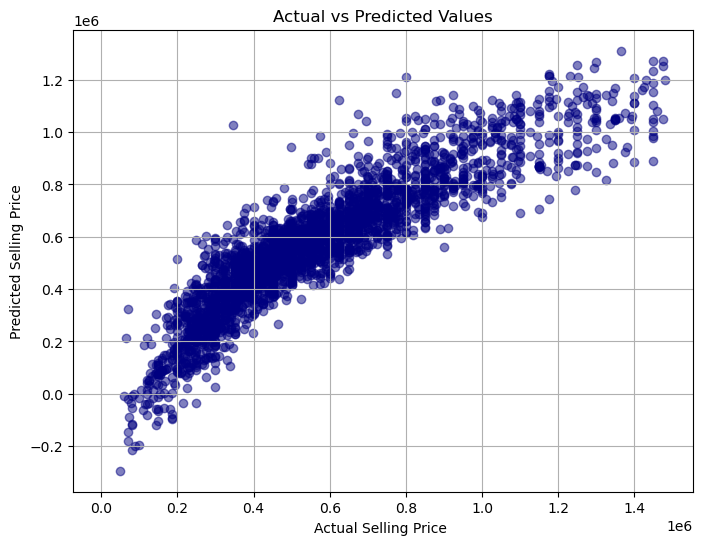

In [263]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='navy')
plt.plot([0, 5], [0, 5], color='red', linestyle='--')
plt.xlabel('Actual Selling Price ')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
 #Random Forest Regressor 

In [189]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [191]:

X = df[['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage','engine','max_power','seats','car_name_encoded']]
y = df['selling_price']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [195]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [197]:
y_pred = model.predict(X_test)

In [ ]:
##Evaluation For Randon Forest Regressor 

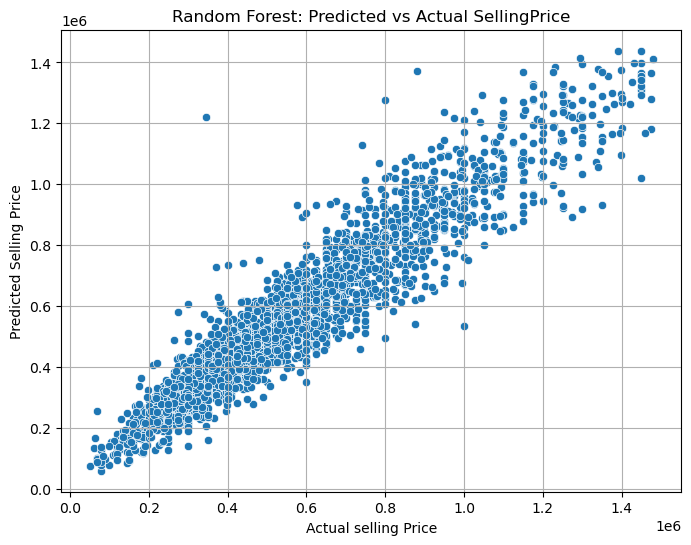

In [201]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest: Predicted vs Actual SellingPrice")
plt.grid(True)
plt.show()

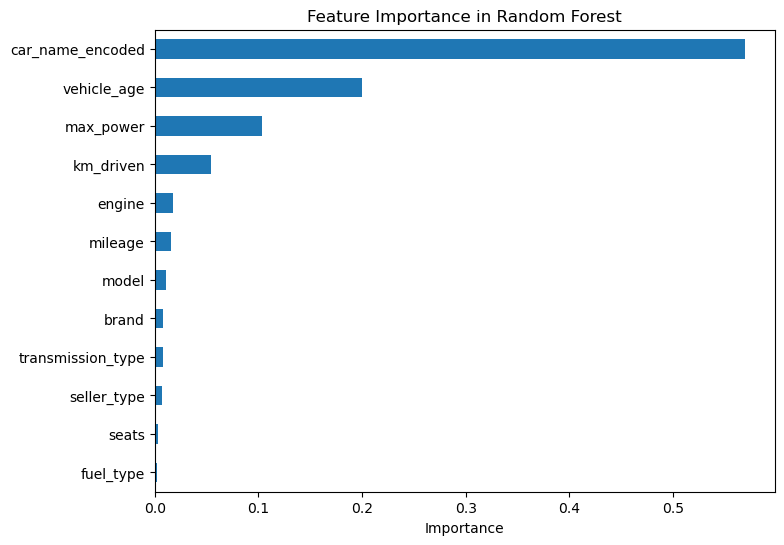

In [203]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6),
                               title="Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.show()

In [ ]:
### Support Vector Regressor 

In [205]:
df

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded
0,0,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000,245452.442159
1,1,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000,474451.724138
2,2,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000,543603.752759
3,3,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000,245452.442159
4,4,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000,706227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000,279175.609756
14021,19540,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000,719860.058309
14022,19541,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000,565895.605125
14023,19542,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000,927996.575342


In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [209]:

X = df[['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage','engine','max_power','seats','car_name_encoded']]
y = df['selling_price']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [215]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [217]:
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

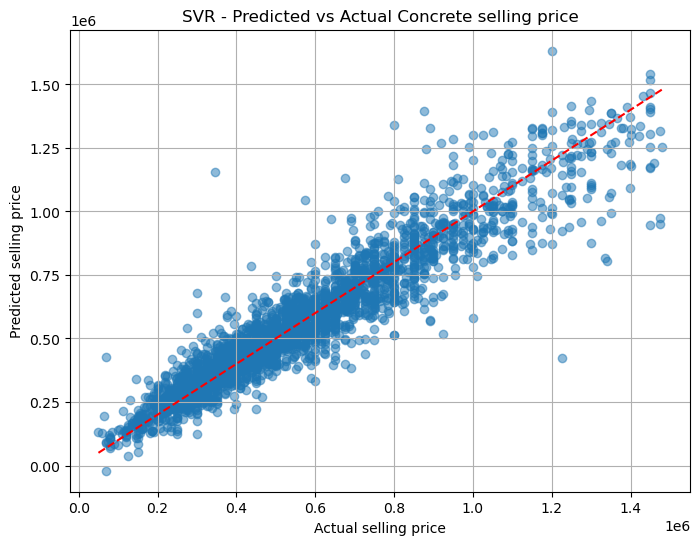

In [221]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual selling price")
plt.ylabel("Predicted selling price")
plt.title("SVR - Predicted vs Actual Concrete selling price")
plt.grid(True)
plt.show()

In [ ]:
#KNN Regressor  Model

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [188]:
df

,Unnamed: 0,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded
0,0,13,5,9,11.695255,1,3,1,19.70,796,46.30,5,120000,245452.442159
1,1,6,40,5,9.903538,1,3,1,18.90,1197,82.00,5,550000,474451.724138
2,2,6,90,11,11.002117,1,3,1,17.00,1197,80.00,5,215000,543603.752759
3,3,13,5,9,10.518700,1,3,1,20.92,998,67.10,5,226000,245452.442159
4,4,4,30,6,10.308986,0,1,1,22.77,1498,98.59,5,570000,706227.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,19537,6,89,9,9.280239,0,3,1,19.81,1086,68.05,5,250000,279175.609756
14021,19540,13,34,2,9.798183,0,3,1,17.50,1373,91.10,7,925000,719860.058309
14022,19541,18,56,6,11.112463,0,1,1,21.14,1498,103.52,5,425000,565895.605125
14023,19542,12,87,5,15.150512,0,1,1,16.00,2179,140.00,7,1225000,927996.575342


In [190]:

X = df[['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage','engine','max_power','seats','car_name_encoded']]
y = df['selling_price']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
# 6. KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [206]:
y_pred = knn.predict(X_test_scaled)

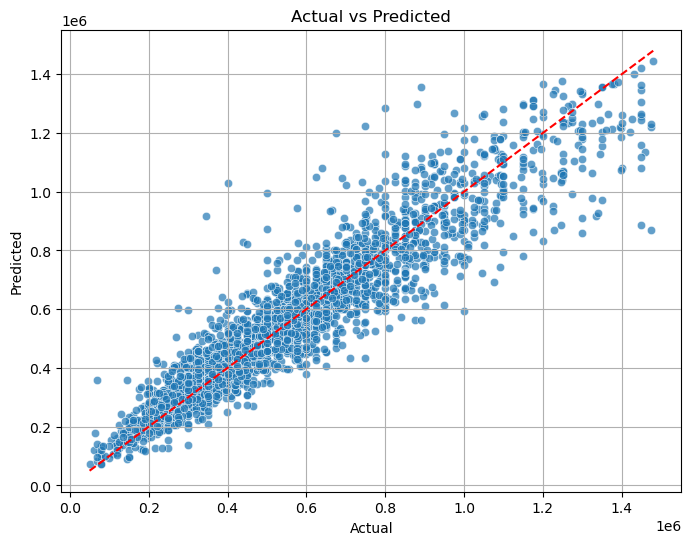

In [216]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

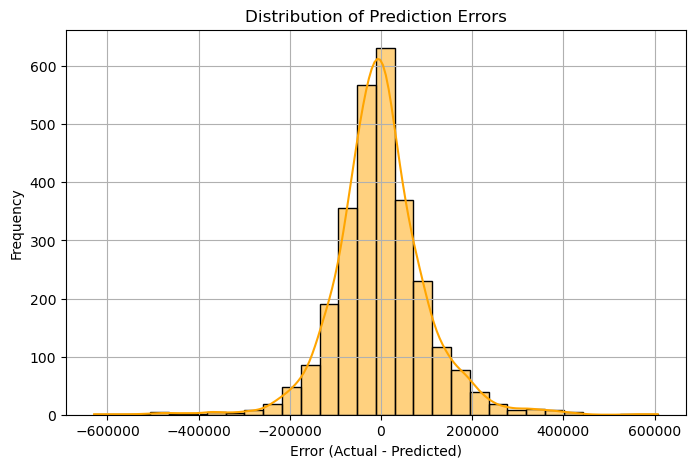

In [218]:
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### 6.2 Train the models and apply hyperparameter tunning.

In [ ]:
####Hyperparameter Tuning  Linear Regression 

In [223]:


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import numpy as np




# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression (Linear regression with L2 regularization)
ridge = Ridge()

# Hyperparameter grid for Random Search
param_dist = {
    'alpha': np.logspace(-3, 3, 50),  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}
"""
alpha: np.logspace(-3, 3, 50) 
→ Generates 50 values from 10^-3 to 10^3
  (covers a wide range of regularization strengths from very weak to very strong).

solver: ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
→ List of algorithms Ridge regression can use internally to compute the solution.

"""
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=10,          # Number of random parameter combinations to try
    scoring='r2',       # Evaluation metric
    cv=5,               # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1           # Use all CPU cores
)

"""estimator=ridge – The model we’re tuning (here, Ridge Regression).

param_distributions=param_dist – The range/list of hyperparameters to randomly pick from.

n_iter=10 – Number of random combinations to try from the parameter grid.

scoring='r2' – Metric to measure model performance (here, R² score).

cv=5 – Use 5-fold cross-validation for evaluation.

random_state=42 – Fixed seed for reproducibility of results.

verbose=1 – Shows progress messages during search.

n_jobs=-1 – Uses all available CPU cores for faster execution."""

# Fit random search
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters from Random Search:", random_search.best_params_)

# Evaluate best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Ridge Regression with Random Search R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from Random Search: {'solver': 'svd', 'alpha': 3.5564803062231287}
Ridge Regression with Random Search R² Score: 0.8082378871374791


In [ ]:
####Hyperparameter Tuning  Random Forest 

In [225]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,             # Number of parameter settings that are sampled
    cv=5,                  # 5-fold cross-validation
    scoring='r2',  # Use negative MSE as scoring
    n_jobs=-1,             # Use all processors
    random_state=42,
    verbose=1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best parameters found:", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict using the best model
y_pred = best_rf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50}
RMSE: 86992.160
R^2 Score: 0.902


In [220]:
####Hyperparameter Tuning  SVR 

In [227]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize SVR model
svr = SVR()

# Define hyperparameter search space
param_dist = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1]     # Epsilon in the epsilon-SVR model
}

# Create randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=10,            # Number of parameter combinations to try
    cv=5,                 # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit random search on training data
random_search.fit(X_train_scaled, y_train_scaled)

# Best parameters and best model
print("Best parameters found:", random_search.best_params_)
best_svr = random_search.best_estimator_

# Predict on test data
y_pred = best_svr.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'C': 100}
RMSE: 634521.589
R² Score: -4.211


In [232]:
##KNN Hyperparamter Tuning 

In [223]:

import numpy as np
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Define hyperparameter search space for KNN Regressor
param_dist = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, scoring='r2', cv=5, random_state=42, n_jobs=-1)

# Fit random search to data
random_search.fit(X, y)

# Output best hyperparameters and best score
print("Best hyperparameters:", random_search.best_params_)
print("Best negative MSE:", random_search.best_score_)


Best hyperparameters: {'n_neighbors': 12, 'p': 2, 'weights': 'distance'}
Best negative MSE: 0.5469630266209624


#### 6.3 Provide detailed observations and conclusions.

In [ ]:
####KNN (k-Nearest Neighbors)

##Best hyperparameters: {'n_neighbors': 12, 'p': 2, 'weights': 'distance'}

##Best negative MSE: 0.546963 (lower is better)

##KNN works well when local neighborhood information is meaningful and can adapt to nonlinear patterns.

##Often outperformed by ensemble methods and more complex models in large and high-dimensional datasets.

####SVC (Support Vector Regression with RBF Kernel)

##Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'C': 100}

##RMSE: 634,521.589 and R²: -4.211 (very poor fit, negative R² means worse than mean prediction)

##Indicates this SVC model configuration is underfitting or not suitable for the data in current form.

######Random Forest

##Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50}

##RMSE: 86,992.160 and R²: 0.902 (strong fit)

##Ensemble model that deals well with nonlinearities and interactions.

##Generally reliable and robust across many tasks; here it delivers the best performance.

####Ridge Regression

##Best parameters: {'solver': 'svd', 'alpha': 3.556}

##R²: 0.808 (respectable linear model fit)

##Captures linear relationships with regularization to avoid overfitting.

##Performs well but less powerful than random forests for complex relationships.

### Section 7: Model Evaluation:

#### 7.1 Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE, R square for regression).

In [225]:
###Linear Regression Evaluation 

In [265]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation :")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean  Squared Error (MSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation :
Mean Squared Error (MSE): 14817322615.542
Root Mean  Squared Error (MSE): 121726.425
Mean Absolute Error (MAE): 91348.496
R² Score: 0.808


In [227]:
###Random Forest  Regression Evaluation 

In [199]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean  Squared Error (MSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
Mean Squared Error (MSE): 8114508862.458
Root Mean  Squared Error (MSE): 90080.569
Mean Absolute Error (MAE): 65264.013
R² Score: 0.895


In [ ]:
###SVR Regressor Evaluation

In [218]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean  Squared Error (MSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
Mean Squared Error (MSE): 9089481249.731
Root Mean  Squared Error (MSE): 95338.771
Mean Absolute Error (MAE): 66123.036
R² Score: 0.882


In [214]:
# 8. KNN Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean  Squared Error (MSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
Mean Squared Error (MSE): 10164378852.496
Root Mean  Squared Error (MSE): 100818.544
Mean Absolute Error (MAE): 71547.219
R² Score: 0.868


#### 7.2 Compare the performance of the models and select the best model based on the evaluation metrics.

In [ ]:
###Random Forest shows the best overall performance ,
##SVR performs well, but slightly worse than Random Forest,
###KNN is better than Linear Regression but worse than Random Forest and SVR,
##Linear Regression performs the worst 

#### 7.3 Provide detailed comparison and analysis of the models’ performance.

In [ ]:
##Random Forest shows the best overall performance:

#Lowest MSE and RMSE indicate it predicts closer to true values.

#Lowest MAE suggests smaller average absolute prediction errors.

##Highest R² (0.895) means it explains nearly 90% of variance in the target, signaling a strong fit.

##SVR performs well, but slightly worse than Random Forest:

##MSE, RMSE, and MAE are higher than Random Forest but still lower than Linear Regression and KNN.

##R² of 0.882 is respectable but slightly less explanatory power.

##KNN is better than Linear Regression but worse than Random Forest and SVR:

##Its MSE and RMSE are higher.

##R² of 0.868 shows decent but weaker fit compared to Random Forest and SVR.

##Linear Regression performs the worst among the four:

##Highest MSE, RMSE, and MAE indicate larger prediction errors.

##R² of 0.808 is the lowest, signifying less variance explained by the model.



### Section 8: Model Deployment with web app:

#### 8.1: Develop an interactive web application using Streamlit.

#### 8.2 Integrate the best-performing machine learning model into the Streamlit app.

#### 8.3 Provide an interface for users to input new data and obtain predictions from the model.

In [135]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:

X = df[['brand', 'model', 'vehicle_age', 'km_driven', 'fuel_type', 
        'seller_type', 'transmission_type', 'mileage', 'engine', 
        'max_power', 'seats', 'car_name']]
y = df['selling_price']


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [131]:
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
categorical_cols = ['brand', 'model', 'fuel_type', 'seller_type', 'transmission_type', 'car_name']

In [137]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [139]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the complete pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [143]:
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [147]:
y_pred = rf_pipeline.predict(X_test)

In [149]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 8356003684.10
Root Mean Squared Error (RMSE): 91411.18
Mean Absolute Error (MAE): 66024.96
R² Score: 0.8919


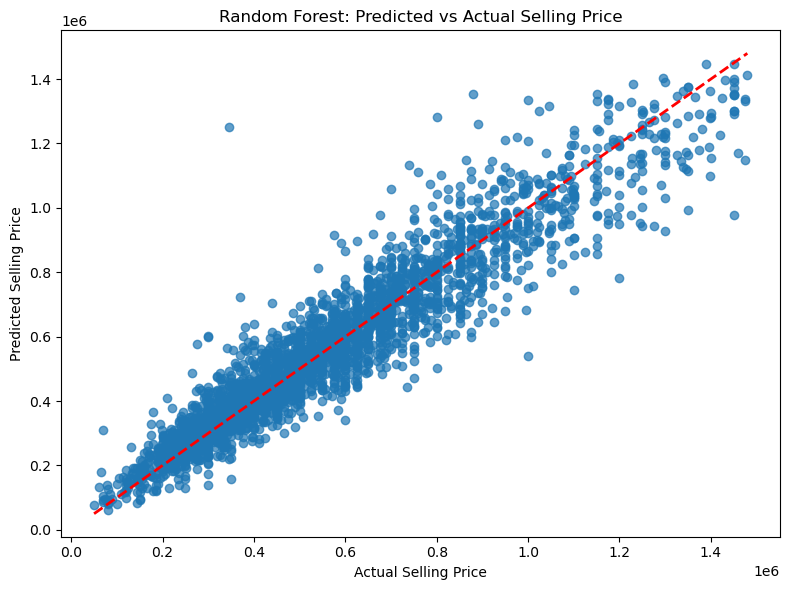

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest: Predicted vs Actual Selling Price")
plt.tight_layout()
plt.show()

In [153]:
feature_names = (numerical_cols + 
                 list(rf_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_cols)))

importances = rf_pipeline.named_steps['regressor'].feature_importances_

In [155]:
feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

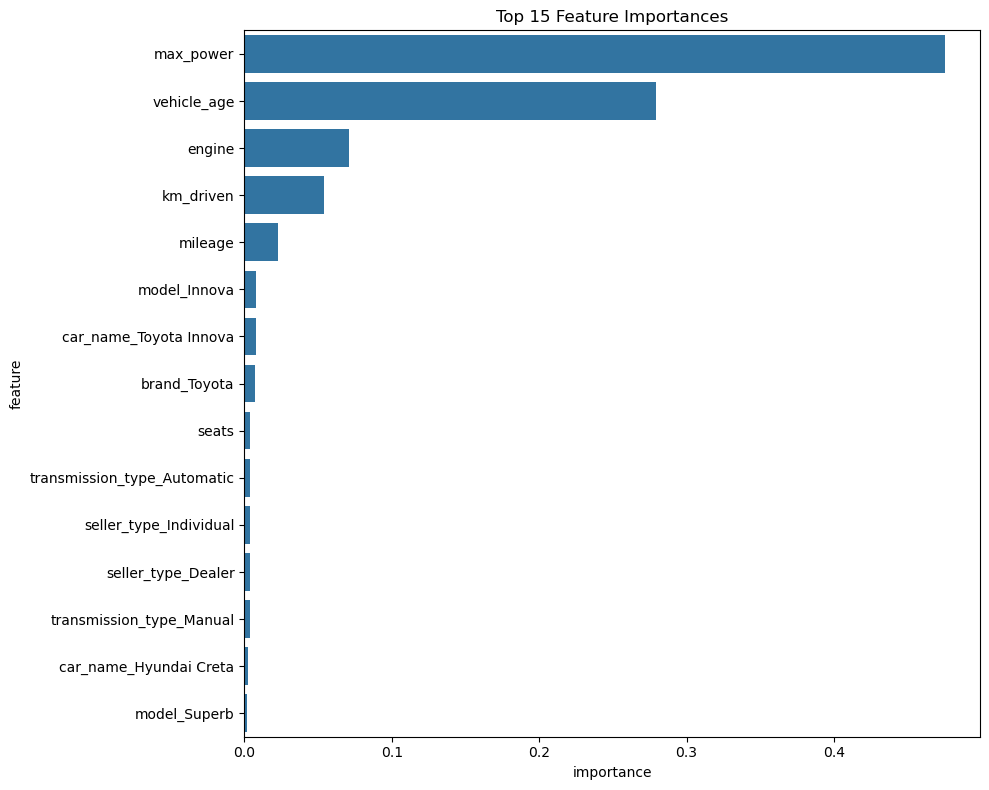

In [157]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_imp_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [163]:
import pickle
with open('rf_pipeline.pkl', 'wb') as model_file:
    pickle.dump(rf_pipeline, model_file)
